# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [4]:
# Your code here. 
import pandas as pd
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data.index = student_data.index + 1
# student_data.index.name = 'StudentID'
student_data

,Age,Tardies
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0
10,30,3


Draw a dispersion diagram (scatter plot) for the data.

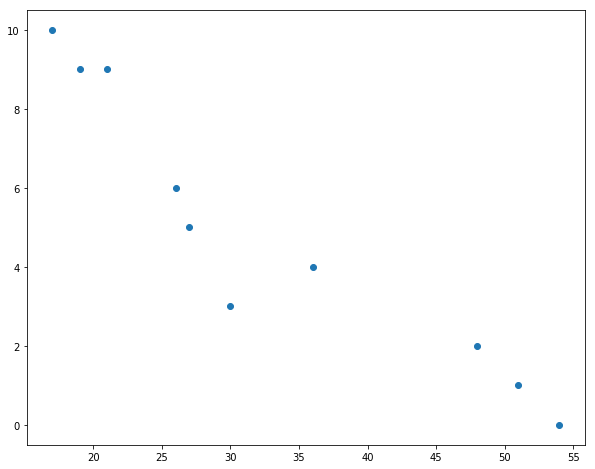

In [14]:
# Your code here.
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.scatter(student_data['Age'], student_data['Tardies'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
# the older the students, the less late they are, so it looks like (even 
# though there are not so many data points) as if there is a strong negative
# relationship between student and tardies (probably because students, like
# me, get more grown up and realise that is it not nice to anyone to be
# late haha)

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [33]:
# Your response here.
import numpy as np
corr = student_data['Age'].corr(student_data['Tardies'])
print(f'The correlation is: ' + str(corr))

# student_data.cov()
student_data['Tardies'].cov(student_data['Age'])

# correlation measures the direction + strength, coveriance only measures the direction
# of the linear relationship

The correlation is: -0.9391626886887122


-45.56666666666666

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [34]:
# Your response here.
# you look at the linear relationship of Age and Tardies, so you will use a linear regression

Plot your regression model on your scatter plot.

/Users/michelle/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


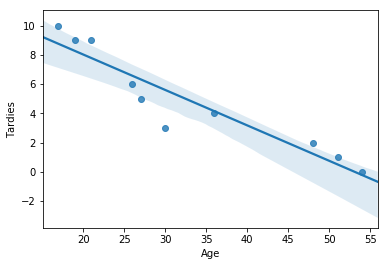

In [32]:
# Your code here.
import seaborn as sns
sns.regplot(x='Age', y='Tardies', data=student_data)

In [43]:
from scipy import stats
X = student_data['Age']
Y = student_data['Tardies']
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
stats.linregress(X,Y)

print('The slope is: ' + str(slope))
print('The intercept is: ' + str(intercept))

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
# the correlation is very strong (almost one) but I think that you still need a lot more data points before you
# can say anything about the relationship
# if you only look at this dataset, it does seem as if the older students get, the less late they are, which (might) 
# makes sense

In [54]:
# just trying

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(student_data['Age'].values.reshape(-1,1), student_data['Tardies'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
intercept = model.intercept_[0]
slope = model.coef_[0][0]
print(intercept)
print(slope)

12.888803363135768
-0.2428207709159808


In [58]:
predictions = [intercept + slope*x for x in student_data['Age']]
predictions

[8.760850257564094,
 0.5049440464207464,
 6.332642548404286,
 7.789567173900171,
 4.1472556101604585,
 1.23340635916869,
 8.275208715732132,
 6.575463319320267,
 -0.2235182663271953,
 5.604180235656344]

In [61]:
# residuals = [student_data['Tardies'][i] - predictions[i] for i in range(len(student_data['Tardies']))]
# residuals = [realvalue - predictedvalue for realvalue, predictedvalue in zip(student_data['Tardies'],predictions)]
# residuals

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [5]:
# Import any libraries you may need & the data
import os
os.getcwd()
vehicles = pd.read_csv('vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [6]:
# Your response here. 
vehicles = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
vehicles.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

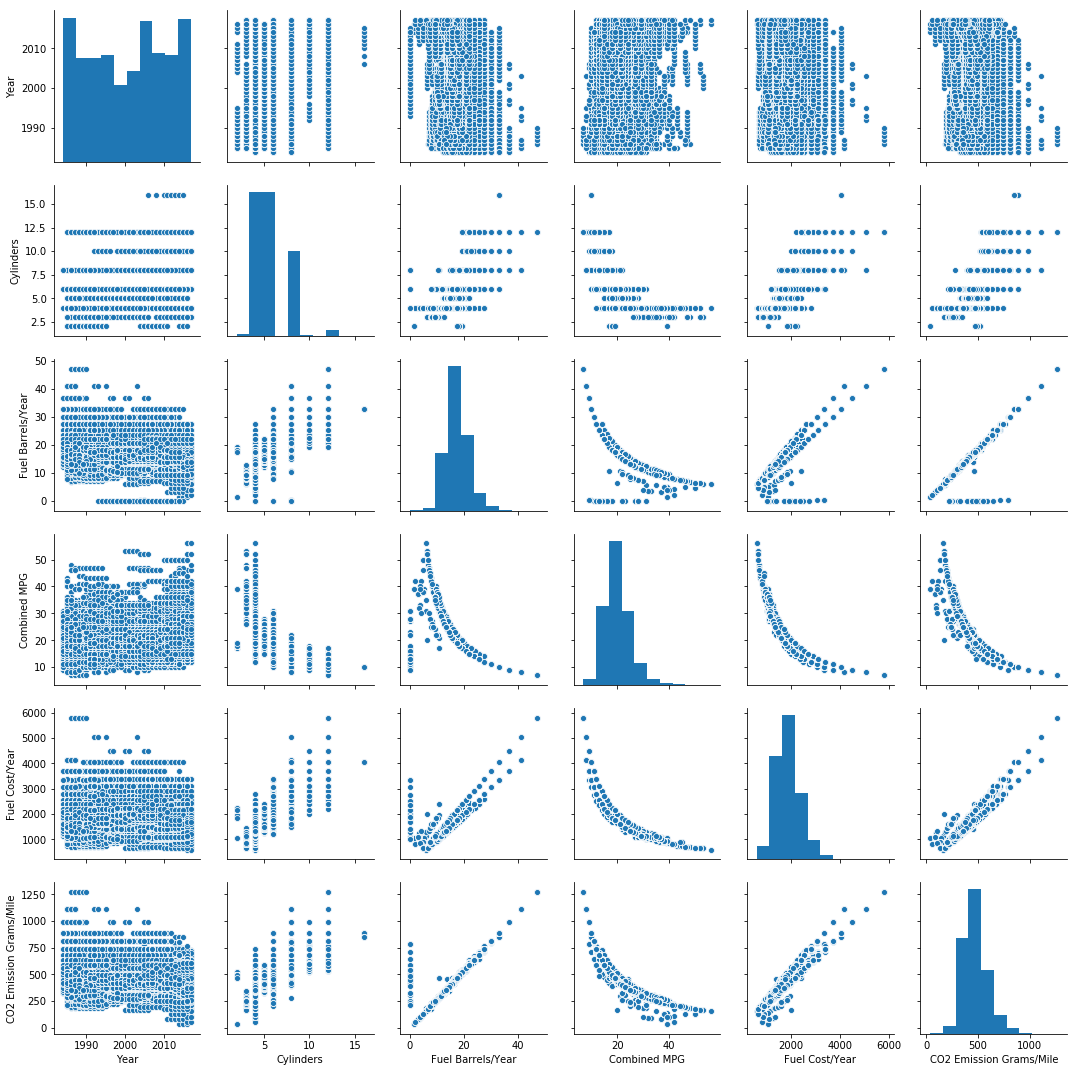

In [80]:
# Your response here. 
# linear regression
# start with pairplot to see the relationships between the columns

import seaborn as sns
%matplotlib inline

vehicles.columns

sns.pairplot(vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']])

In [7]:
vehicles.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

"""
Looking at the pairplots, the strong relationships are between
- Fuel Barrels/Year & Fuel Cost/Year & C02 Emission Grams / Mile & Combined MPG
the difference with the relationship with Combined MPG is that the curve is different, even though the correlation
number do not differ that much (actually all are quite strong)

The more barrels per year, the more cost per year, and the more CO2 Emission (which if you think about is makes sense)
C02 Emission has a relatively (negative) strong relation with Combined MPG, the higher the Combined MPG means the 
more economical the car, so it also makes sense that the relationship with c02 

In general all the correlations with Combined MPG are negative, meaning that all the other values all have a negative 
impact on the economical status of the car
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [5]:
# Your code here. 
invites = pd.DataFrame({'X': [1, 3, 4, 6, 8, 9, 11, 14], 'Y': [1, 2, 4, 4, 5, 7, 8, 13]})
invites

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

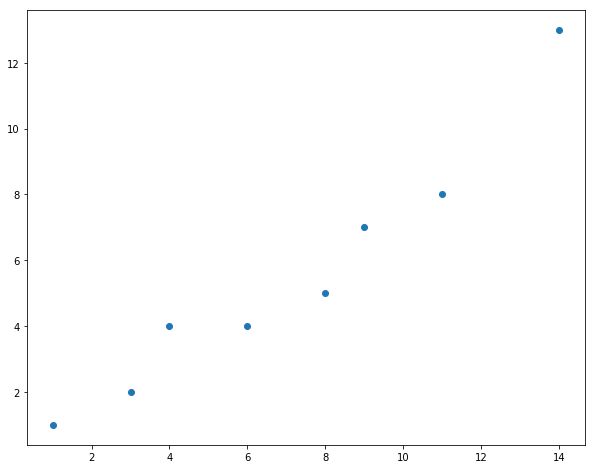

In [8]:
# Your code here.
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(invites['X'],invites['Y'])

/Users/michelle/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


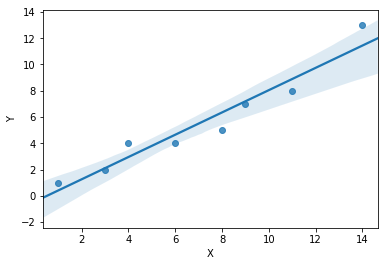

In [9]:
sns.regplot(x="X", y="Y", data=invites)


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

"""
I would say the relationship is strong and positive (linear), so the more people she invites, the more people are 
able to attend
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 